#Lab 3- Naive Bayes - Discrete Classification

##Fengbo Ma
##Nov 16, 2022

- Change the Gaussian Naive Bayes(which we have seen in class) to discrete Naive Bayes for a random dataset with n = 1000 (# of data points) and d = 2 (# of dimensions) for a binary classification y [0,1]. x1 and x2 can get any values between [0 and 1]. Following is an example of the table which you need to generate:(20 points)

- Implement the Laplace Smoothing function for the NaiveBayes class. (20 points)

- Update your Naive Bayes class functions to account for a discrete classification using what we have learned in the class. (30 points)

##Import packages

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import math
from sklearn.model_selection import train_test_split
from dataclasses import dataclass
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.datasets import make_blobs
import random

##Generate Discrete Data

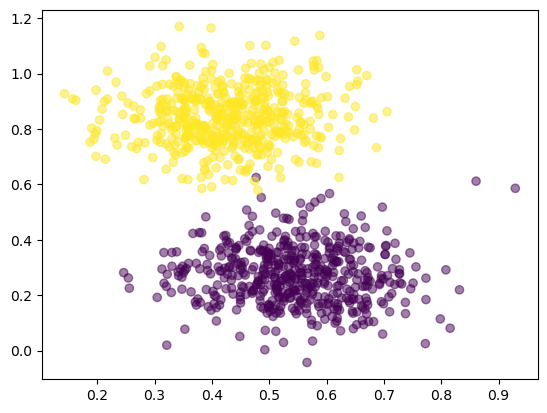

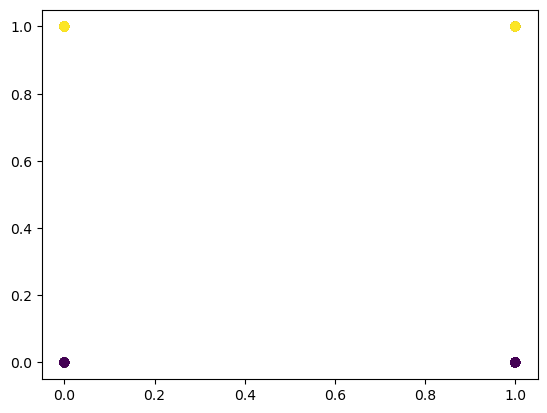

In [2]:
random.seed(1)

# Make Blobs using make_blobs with set up needed
X,y = make_blobs(n_samples=1000, n_features=2, centers = 2, center_box= (0,1), cluster_std = 0.1, random_state = 100)


# Plot out to vis the distribution
X1p = X[:,0]
X2p = X[:,1]
plt.scatter(X1p, X2p, c=y, alpha=0.5)
plt.show()

# Round to nearest Int for both columns to make them Discrete
X = np.rint(X)

X=X.astype(int)
y=y.astype(int)

# Plot out to vis the distribution
X1p = X[:,0]
X2p = X[:,1]
plt.scatter(X1p, X2p, c=y, alpha=0.5)
plt.show()



In [3]:
print(X)

print(X.shape)

print(X[0,0])

print(type(X[0,0]))

[[1 1]
 [1 0]
 [0 0]
 ...
 [0 1]
 [0 0]
 [1 0]]
(1000, 2)
1
<class 'numpy.int32'>


In [4]:
print(y)

print(y.shape)

print(y[0])

print(type(y[0]))

[1 0 0 1 1 1 0 1 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0
 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 1
 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 0 1 1 1
 0 0 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0
 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1
 0 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 1
 1 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1
 1 0 0 1 1 1 0 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0
 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0
 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0
 1 1 0 1 0 0 0 1 1 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1
 1 0 1 0 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0
 1 1 1 1 0 1 0 1 0 1 1 0 

## Naive Bayes Function - Discrete

In [5]:
class naiveBayes:
  def __init__(self, X, y, laplaceSmooth) -> None:
    self.X = X
    self.y = y
    self.laplaceSmooth = laplaceSmooth


  def dataSplit(self):
    self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size = 0.3, random_state = 0)



  def fit_likelihood(self, x, y):
    n = len(x)
    m = len(y)
    likelihood  = n / m
    if n == 0:
      laplace=( n + self.laplaceSmooth ) / ( m + self.laplaceSmooth * self.X.shape[1] )
    else:
      laplace= likelihood
    return laplace

  def probability(self, x, y, prior):
    return prior * x * y

  def fit(self):

    self.dataSplit()

    self.X0_train = self.X_train[self.y_train == 0]
    self.X1_train = self.X_train[self.y_train == 1]

    #prior
    self.prior_y0 = len(self.X0_train) / len(self.X_train)
    self.prior_y1 = len(self.X1_train) / len(self.X_train)

    #likelihood for class 0
    self.likelihood_X0y0 = []
    self.likelihood_X1y0 = []
    self.likelihood_X0y1 = []
    self.likelihood_X1y1 = []

    for i in range(2):
      self.likelihood_X0y0.append(self.fit_likelihood(self.X0_train[self.X0_train[:, 0] == i], self.X0_train))
      self.likelihood_X1y0.append(self.fit_likelihood(self.X0_train[self.X0_train[:, 1] == i], self.X0_train))
    #likelihood for class 1
      self.likelihood_X0y1.append(self.fit_likelihood(self.X1_train[self.X1_train[:, 0] == i], self.X1_train))
      self.likelihood_X1y1.append(self.fit_likelihood(self.X1_train[self.X1_train[:, 1] == i], self.X1_train))

  def predict(self):

    for sample, target in zip(self.X_test, self.y_test):
      py0 = self.probability(self.prior_y0, self.likelihood_X0y0[sample[0]], self.likelihood_X1y0[sample[1]])
      py1 = self.probability(self.prior_y1, self.likelihood_X0y1[sample[0]], self.likelihood_X1y1[sample[1]])

      print('P(y = 0| %s) = %f' % (sample, py0))
      print('P(y = 1| %s) = %f' % (sample, py1))

      print("The point belongs to class {} and predicted {}".format(target, np.argmax([py0,py1])))

##Apply the Classifier without Laplace Smoothing

In [6]:
nbNoLS = naiveBayes(X,y,laplaceSmooth = 0)
nbNoLS.fit()

In [7]:
nbNoLS.predict()

P(y = 0| [0 1]) = 0.002566
P(y = 1| [0 1]) = 0.395714
The point belongs to class 1 and predicted 1
P(y = 0| [1 0]) = 0.338281
P(y = 1| [1 0]) = 0.000000
The point belongs to class 0 and predicted 0
P(y = 0| [1 0]) = 0.338281
P(y = 1| [1 0]) = 0.000000
The point belongs to class 0 and predicted 0
P(y = 0| [1 0]) = 0.338281
P(y = 1| [1 0]) = 0.000000
The point belongs to class 0 and predicted 0
P(y = 0| [0 1]) = 0.002566
P(y = 1| [0 1]) = 0.395714
The point belongs to class 1 and predicted 1
P(y = 0| [1 1]) = 0.006005
P(y = 1| [1 1]) = 0.112857
The point belongs to class 1 and predicted 1
P(y = 0| [1 1]) = 0.006005
P(y = 1| [1 1]) = 0.112857
The point belongs to class 1 and predicted 1
P(y = 0| [0 1]) = 0.002566
P(y = 1| [0 1]) = 0.395714
The point belongs to class 1 and predicted 1
P(y = 0| [0 1]) = 0.002566
P(y = 1| [0 1]) = 0.395714
The point belongs to class 1 and predicted 1
P(y = 0| [0 1]) = 0.002566
P(y = 1| [0 1]) = 0.395714
The point belongs to class 1 and predicted 1
P(y = 0| [

##Apply the Classifier with Laplace Smoothing

In [8]:
nbWithLS = naiveBayes(X,y,laplaceSmooth = 1)
nbWithLS.fit()

In [9]:
nbWithLS.predict()

P(y = 0| [0 1]) = 0.002566
P(y = 1| [0 1]) = 0.395714
The point belongs to class 1 and predicted 1
P(y = 0| [1 0]) = 0.338281
P(y = 1| [1 0]) = 0.000315
The point belongs to class 0 and predicted 0
P(y = 0| [1 0]) = 0.338281
P(y = 1| [1 0]) = 0.000315
The point belongs to class 0 and predicted 0
P(y = 0| [1 0]) = 0.338281
P(y = 1| [1 0]) = 0.000315
The point belongs to class 0 and predicted 0
P(y = 0| [0 1]) = 0.002566
P(y = 1| [0 1]) = 0.395714
The point belongs to class 1 and predicted 1
P(y = 0| [1 1]) = 0.006005
P(y = 1| [1 1]) = 0.112857
The point belongs to class 1 and predicted 1
P(y = 0| [1 1]) = 0.006005
P(y = 1| [1 1]) = 0.112857
The point belongs to class 1 and predicted 1
P(y = 0| [0 1]) = 0.002566
P(y = 1| [0 1]) = 0.395714
The point belongs to class 1 and predicted 1
P(y = 0| [0 1]) = 0.002566
P(y = 1| [0 1]) = 0.395714
The point belongs to class 1 and predicted 1
P(y = 0| [0 1]) = 0.002566
P(y = 1| [0 1]) = 0.395714
The point belongs to class 1 and predicted 1
P(y = 0| [

##Update Naive Bayes class function

In [10]:
class naiveBayesUpdate:
  def __init__(self, X, y, laplaceSmooth, isDataDiscrete):
    self.X = X
    self.y = y
    self.isDataDiscrete = isDataDiscrete
    self.laplaceSmooth = laplaceSmooth

  def dataSplit(self):
    self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size = 0.3, random_state = 0)
  
  # For Gaussian distribution
  def fit_dist(self, data):
    mean = np.mean(data)
    std = np.std(data)
    dist = norm(mean, std)
    return dist

  # For Discrete
  def fit_likelihood(self, x, y):
    n = len(x)
    m = len(y)
    likelihood  = n / m
    if n==0:
      laplace=( n + self.laplaceSmooth ) / ( m + self.laplaceSmooth * self.X.shape[1] )
    else:
      laplace = likelihood
    return laplace

  def probability(self, x, y, prior):
    return prior * x * y 

  def proability(self, X, prior, dist1, dist2):
    return prior * dist1.pdf(X[0]) * dist2.pdf(X[1])

  def fit(self):
    self.dataSplit()
    
    if self.isDataDiscrete == False:
      self.X0_train = self.X_train[self.y_train == 0]
      self.X1_train = self.X_train[self.y_train == 1]

      #prior
      self.prior_y0 = len(self.X0_train)/ len(self.X_train)
      self.prior_y1 = len(self.X1_train)/ len(self.X_train)

      #pdf for class 0
      self.dist_X0y0 = self.fit_dist(self.X0_train[:, 0])
      self.dist_X1y0 = self.fit_dist(self.X0_train[:, 1])


      #pdf for class 1
      self.dist_X0y1 = self.fit_dist(self.X1_train[:, 0])
      self.dist_X1y1 = self.fit_dist(self.X1_train[:, 1])

    elif self.isDataDiscrete == True:

      self.X0_train = self.X_train[self.y_train == 0]
      self.X1_train = self.X_train[self.y_train == 1]

      #prior
      self.prior_y0 = len(self.X0_train)/ len(self.X_train)
      self.prior_y1 = len(self.X1_train)/ len(self.X_train)

      #likelihood for class 0
      self.likelihood_X0y0 = []
      self.likelihood_X1y0 = []
      self.likelihood_X0y1 = []
      self.likelihood_X1y1 = []
      for i in range(2):
        self.likelihood_X0y0.append(self.fit_likelihood(self.X0_train[self.X0_train[:, 0] == i], self.X0_train))
        self.likelihood_X1y0.append(self.fit_likelihood(self.X0_train[self.X0_train[:, 1] == i], self.X0_train))
      #likelihood for class 1
        self.likelihood_X0y1.append(self.fit_likelihood(self.X1_train[self.X1_train[:, 0] == i], self.X1_train))
        self.likelihood_X1y1.append(self.fit_likelihood(self.X1_train[self.X1_train[:, 1] == i], self.X1_train))
    else:
      print('the tpye of data is woring')

  

  def predict(self):
    if self.isDataDiscrete == False:
      for sample, target in zip(self.X_test, self.y_test):
        py0 = self.proability(sample, self.prior_y0, self.dist_X0y0, self.dist_X1y0)
        py1 = self.proability(sample, self.prior_y1, self.dist_X0y1, self.dist_X1y1)

        print('P(y = 0| %s) = %f' % (sample, py0))
        print('P(y = 1| %s) = %f' % (sample, py1))

        print("The point belongs to class {} and predicted {}".format(target, np.argmax([py0,py1])))

    elif self.isDataDiscrete == True:
      for sample, target in zip(self.X_test, self.y_test):
        py0 = self.probability(self.prior_y0, self.likelihood_X0y0[sample[0]], self.likelihood_X1y0[sample[1]])
        py1 = self.probability(self.prior_y1, self.likelihood_X0y1[sample[0]], self.likelihood_X1y1[sample[1]])

        print('P(y = 0| %s) = %f' % (sample, py0))
        print('P(y = 1| %s) = %f' % (sample, py1))

        print("The point belongs to class {} and predicted {}".format(target, np.argmax([py0,py1])))


In [15]:
nbU = naiveBayesUpdate(X,y,laplaceSmooth = 1, isDataDiscrete=True)
nbU.fit()

In [16]:
nbU.predict()

P(y = 0| [0 1]) = 0.002566
P(y = 1| [0 1]) = 0.395714
The point belongs to class 1 and predicted 1
P(y = 0| [1 0]) = 0.338281
P(y = 1| [1 0]) = 0.000315
The point belongs to class 0 and predicted 0
P(y = 0| [1 0]) = 0.338281
P(y = 1| [1 0]) = 0.000315
The point belongs to class 0 and predicted 0
P(y = 0| [1 0]) = 0.338281
P(y = 1| [1 0]) = 0.000315
The point belongs to class 0 and predicted 0
P(y = 0| [0 1]) = 0.002566
P(y = 1| [0 1]) = 0.395714
The point belongs to class 1 and predicted 1
P(y = 0| [1 1]) = 0.006005
P(y = 1| [1 1]) = 0.112857
The point belongs to class 1 and predicted 1
P(y = 0| [1 1]) = 0.006005
P(y = 1| [1 1]) = 0.112857
The point belongs to class 1 and predicted 1
P(y = 0| [0 1]) = 0.002566
P(y = 1| [0 1]) = 0.395714
The point belongs to class 1 and predicted 1
P(y = 0| [0 1]) = 0.002566
P(y = 1| [0 1]) = 0.395714
The point belongs to class 1 and predicted 1
P(y = 0| [0 1]) = 0.002566
P(y = 1| [0 1]) = 0.395714
The point belongs to class 1 and predicted 1
P(y = 0| [

In [17]:
nbUG = naiveBayesUpdate(X,y,laplaceSmooth = 1, isDataDiscrete=False)
nbUG.fit()

In [18]:
nbU.predict()

P(y = 0| [0 1]) = 0.002566
P(y = 1| [0 1]) = 0.395714
The point belongs to class 1 and predicted 1
P(y = 0| [1 0]) = 0.338281
P(y = 1| [1 0]) = 0.000315
The point belongs to class 0 and predicted 0
P(y = 0| [1 0]) = 0.338281
P(y = 1| [1 0]) = 0.000315
The point belongs to class 0 and predicted 0
P(y = 0| [1 0]) = 0.338281
P(y = 1| [1 0]) = 0.000315
The point belongs to class 0 and predicted 0
P(y = 0| [0 1]) = 0.002566
P(y = 1| [0 1]) = 0.395714
The point belongs to class 1 and predicted 1
P(y = 0| [1 1]) = 0.006005
P(y = 1| [1 1]) = 0.112857
The point belongs to class 1 and predicted 1
P(y = 0| [1 1]) = 0.006005
P(y = 1| [1 1]) = 0.112857
The point belongs to class 1 and predicted 1
P(y = 0| [0 1]) = 0.002566
P(y = 1| [0 1]) = 0.395714
The point belongs to class 1 and predicted 1
P(y = 0| [0 1]) = 0.002566
P(y = 1| [0 1]) = 0.395714
The point belongs to class 1 and predicted 1
P(y = 0| [0 1]) = 0.002566
P(y = 1| [0 1]) = 0.395714
The point belongs to class 1 and predicted 1
P(y = 0| [